# Project 2: Monte Carlo

---
## Estimasi nilai $\pi$ dengan Monte Carlo
Dalam project kali ini kita akan membuat suatu program simulasi untuk mengestimasi nilai $\pi$ dengan menggunakan metode **Monte Carlo**. 

Monte Carlo merupakan sebuah algoritme matematis yang berdasarkan simulasi dari nilai-nilai random yang diulang-ulang berkali-kali untuk memprediksi distribusi suatu fenomena yang banyak digunakan untuk analisis resiko dan pengambilan keputusan.

### Project Items:
1. Estimasi luas lingkaran dengan MC.
2. Estimasi nilai $\pi$ dengan MC.
3. Menghitung _error relative_ dari estimasi $\pi$ dengan MC.

### Fungsi lingkaran:
$$L((x_0,y_0),r) \equiv (x-x_0)^2+(y-y_0)^2=r^2$$
merupakan suatu lingkaran yang berpusat di $(x_0,y_0)$ (contoh: titik $\times$ pada gambar di bawah) dengan jari-jari $r$. Titik-titik $(x,y)$ yang memenuhi persamaan tersebut merupakan suatu titik yang berada digaris lingkaran $L((x_0,y_0),r)$.

**Catatan:** Jari-jari, $r$, merupakan jarak dari titik pusat lingkaran $(x_0,y_0)$ ke tepi/garis lingkaran, atau setengah dari diameter lingkaran.

Penjelasan mudahnya:
* Jika suatu titik $(x,y)$ sedemikian hingga $(x-x_0)^2+(y-y_0)^2 < r^2$, maka titik tersebut berada di **DALAM** lingkaran $L((x_0,y_0),r)$ -- (contoh: titik $\triangle$).
* Jika suatu titik $(x,y)$ sedemikian hingga $(x-x_0)^2+(y-y_0)^2 > r^2$, maka titik tersebut berada di **LUAR** lingkaran $L((x_0,y_0),r)	$ -- (contoh: titik $+$).
* Jika suatu titik $(x,y)$ sedemikian hingga $(x-x_0)^2+(y-y_0)^2 = r^2$, maka titik tersebut berada **TEPAT DI GARIS** lingkaran $L((x_0,y_0),r)$ -- (contoh: titik $\bigcirc$).

![alt text](https://github.com/sykrn/py-dts/blob/master/asets/linkaran.png?raw=true)



---
## Tugas #1

### Soal
Buatlah sebuah fungsi `isPointInCircle` dengan _posisional argument_ `x,y,r` dan _keyword argument_ `center` dengan _default value_ sebuah _tuple_ dua nilai `(0,0)`. Untuk menentukan apakah titik `(x,y)` berada di dalam atau di luar lingkaran $L(\rm{center},r)$. Keluaran fungsi `isPointInCircle` merupakan suatu nilai _boolean_, `True` Jika titik `(x,y)` berada di dalam lingkaran dan `False` Jika berada di luar.

**Catatan:** Titik yang berada tepat di lingkaran dikategorikan sebagai dalam, maka `True`.

### Jawaban

In [1]:
def isPointInCircle(x, y, r, center=(0, 0)):
	return (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r ** 2

### Cek Hasil
**Hasil yang diharapkan:**
```
False True True False
```

**Output:**

In [2]:
print(isPointInCircle(1,1,1,center=(0,0)),isPointInCircle(1,0,1,center=(0,0)),
      isPointInCircle(1,1,1,center=(1,0)),isPointInCircle(0,0,1,center=(1,1)))

False True True False


---
## Tugas #2

### Soal
Buatlah sebuah fungsi `generateRandomSquarePoints` dengan dua _positional argumen_ `n` dan `length`, dan _keyword argument_ `center` _default:_ _tuple_ `(0,0)`. Fungsi ini akan mengeluarkan suatu _list_ dengan jumlah `n` titik _random_ `[x,y]` yang berada di dalam suatu kotak persegi dengan panjang `length` dan titik tengah `center`. Keluaran fungsi merupakan _list_ dari `n` titik _random_ `[x,y]`, cth: `[[x1,y1],...,[xn,yn]]`.

**Petunjuk:**
1. Jarak titik tengah `center` ke tepi persegi sama dengan `length/2`.
2. Untuk menghasilkan nilai random, gunakan `random.uniform`, penjelasan [random.uniform](https://docs.python.org/3/library/random.html#random.uniform). Untuk menentukan nilai `a` dan `b` dari fungsi `random.uniform`, coba perhatikan gambar di cell bawah dengan `center=(0,0)`.<br>Catatan: harus fleksible ketika titik `center` berubah.
3. Gunakan _list comprehension_ untuk men-_generate_ n titik x,y tersebut.
4. Untuk menyelesaikan hanya butuh ubah satu baris kode, ganti `None` value, dengan kode anda.

### Jawaban

In [3]:
import random
def generateRandomSquarePoints(n, length, center=(0, 0)):
	minx = center[0] - length / 2
	miny = center[1] - length / 2
	maxx = center[0] + length / 2
	maxy = center[1] + length / 2
	return [[random.uniform(minx, maxx), random.uniform(miny, maxy)] for i in range(n)]

### Cek Hasil
**Hasil yang diharapkan:**

Hasil _generate_ 100 _points_ di dalam persegi dengan panjang sisi 1 dan berpusat di (0,0):
```
[[-0.18985243068066737, 0.22983174826012864],
 [0.3988382879679935, 0.18398393191544127],
 [-0.027857284547286643, -0.3992987919316342],
 [-0.06582816454621632, 0.1108869734438016],
 [0.4130110532378982, 0.4666063677707588]]
```

**Output:**

In [4]:
random.seed(0)
points = generateRandomSquarePoints(100,1)
print(points[10:15])

[[-0.18985243068066737, 0.22983174826012864], [0.3988382879679935, 0.18398393191544127], [-0.027857284547286643, -0.3992987919316342], [-0.06582816454621632, 0.1108869734438016], [0.4130110532378982, 0.4666063677707588]]


### Visualisasi

Mari kita visualisasikan. Jika sama dengan gambar di bawah ini maka keluaran sesuai harapan.

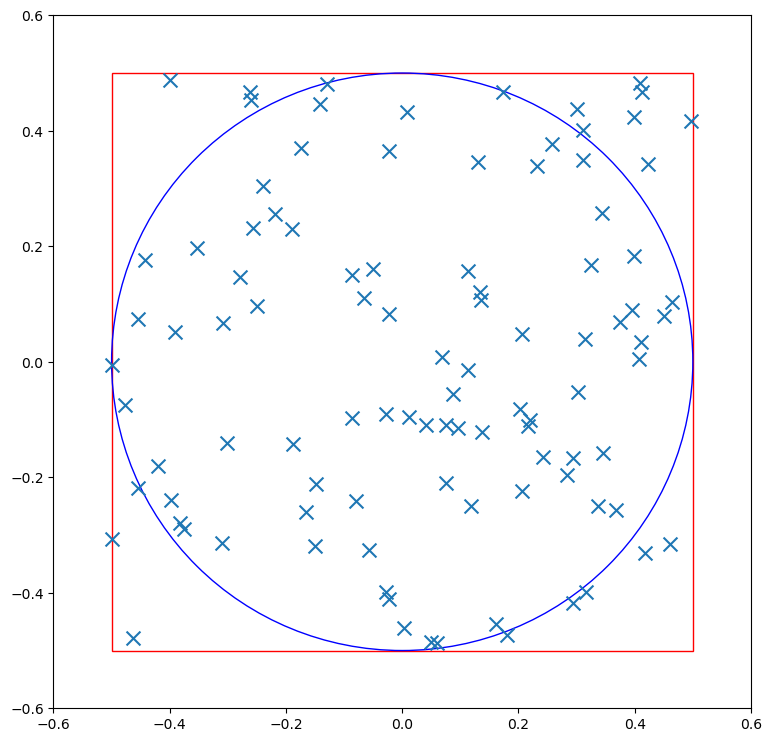

In [5]:
import matplotlib.pyplot as plt

x,y = zip(*points)
r1 = plt.Rectangle((-0.5, -0.5), 1, 1, color='r', fill=False)
c1 = plt.Circle((0,0), 0.5, color='b', fill=False)
fig, ax = plt.subplots(figsize=(9,9)) 
ax.add_artist(r1)
ax.add_artist(c1)
plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.scatter(x, y, s=100, marker='x')
plt.show()

![alt text](https://github.com/sykrn/py-dts/blob/master/asets/persegilink.png?raw=true)

---

## Menghitung Luas Lingkaran dengan estimasi MC
Kita bisa mengestimasi luas lingkaran dengan MC sebagai berikut.
1. Buatlah titik-titik random sebanyak mungkin di dalam sebuah persegi yang bersinggungan dengan lingkaran yang berada di dalamnya yang akan kita hitung luasannya seperti gambar di atas.
2. Hitunglah jumlah titik-titik yang berada di dalam lingkaran tersebut.
3. Estimasi:
$$\frac{n_{titik-dalam-lingkaran}}{n_{total-titik}}=\frac{Luas Lingkaran}{Luas Persegi}$$
maka,
$$Luas Lingkaran=\frac{n_{titik-dalam-lingkaran}}{n_{total-titik}}\times Luas Persegi$$
di mana,
$$Luas Persegi = sisi \times sisi$$
mudah untuk dihitung.

---
## Tugas #3

### Soal
Buatlah fungsi `MCCircleArea` dengan _positional argument_ `r` dan _keyword argument_ dengan _default_ `n=100` dan `center=(0,0)`, untuk menghitung luas lingkaran dengan jari-jari $r$ dengan mengestimasi dari `n` titik random. Keluaran fungsi merupakan suatu nilai yang menunjukkan estimasi luas lingkaran tersebut.

**Petunjuk:**
1. Gunakan fungsi yang sudah dibuat di atas `isPointInCircle` dan `generateRandomSquarePoints`.
2. Perhatikan gambar lingkaran dan persegi di atas, jari-jari $r$ lingkaran sama dengan setengah dari panjang sisi persegi.
3. Lingkaran dan persegi memiliki pusat yang sama.

### Jawaban

In [6]:
def MCCircleArea(r, n=100, center=(0,0)):
	sp = generateRandomSquarePoints(n, r*2, center)
	cp = [[pt[0], pt[1]] for pt in sp if isPointInCircle(pt[0], pt[1], r, center)]
	return (r * 2) ** 2 * (len(cp) / len(sp))

### Cek Hasil
**Hasil yang diharapkan:**
```
3.28 3.2
```

**Output:**

In [7]:
random.seed(0)
print(MCCircleArea(1,100), MCCircleArea(1,10,center=(10,10)))

3.28 3.2


---
## Estimasi $\pi$

### Luas lingkaran
$$Luas = \pi r^2$$

sehingga untuk mengestimasi nilai $\pi$ sama dengan mengestimasi luas lingkaran dengan jari-jari $r=1$.

### _Law of large numbers_ (LLN)
merupakan hukum statistik dimana kita bisa menghitung nilai rata-rata dari suatu distribusi atau bahkan standar deviasinya dengan menggunakan banyak sampel. LLN umum digunakan di dalam metode MC.

Penjelasan mudahnya: Semakin banyak sampel semakin akurat untuk menghitung rata-rata atau nilai mean-nya. 

### Estimasi $\pi$ lebih akurat dengan LLN
1. Estimasi luas lingkaran dengan jari-jari satu dengan menggunakan sejumlah titik-titik random.
2. lakukan sebanyak mungkin langkah 1.
3. ambil nilai rata-ratanya, yaitu $\mu = \sum x/n$, yang merupakan estimasi akhir dari metode MC.

---
## Tugas #4

### Soal
Buatlah fungsi `LLNPiMC` untuk mengestimasi nilai `pi` dengan _positional argumen_ `nsim` dan `nsample`. `nsample` merupakan jumlah sample titik-titik random untuk menghitung luas lingkaran berjari-jari 1 (maka Luas = $\pi$) dan `nsim` merupakan jumlah simulasi untuk menghitung nilai rata-rata atau mean dari estimasi nilai $\pi$. Keluaran fungsi merupakan nilai _mean_ dari simulasi tersebut (estimasi nilai $\pi$).

### Jawaban

In [8]:
def LLNPiMC(nsim, nsample):
	sd = [MCCircleArea(1, nsample) for i in range(nsim)]
	return sum(sd) / len(sd)

### Cek Hasil
**Hasil yang diharapkan:**
```
est_pi: 3.1416055999999823
act_pi: 3.141592653589793
```

**Output:**

In [9]:
import math

random.seed(0)
estpi = LLNPiMC(10000,500)

print('est_pi:', estpi)
print('act_pi:', math.pi)

est_pi: 3.1416055999999823
act_pi: 3.141592653589793


---
## Menghitung error relatif
$$E = \|\frac{estimasi-aktual}{aktual}\|\times 100$$
$\|\dots\|$ merupakan nilai absolut atau mutlak (selalu positif).

---
## Tugas #5

### Soal
Buatlah fungsi `relativeError`, dengan _argument_ `act` yang merupakan nilai aktual, dan `est` yang merupakan nilai estimasi.

### Jawaban

In [10]:
def relativeError(act, est):
	return abs((est - act) / act) * 100

### Cek Hasil
**Hasil yang diharapkan:**
```
error relatif: 0.0004120970353822341 %
```

**Output:**

In [11]:
print('error relatif:', relativeError(math.pi,estpi), '%')

error relatif: 0.0004120970353822341 %
